<a href="https://www.kaggle.com/code/bhargavichintalapati/assignment4-walmart-bc?scriptVersionId=111428830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Call Libraries

In [1]:
## 1.0 Call needed libraries

#%reset -f              # Clear all variables

# 1.1 Load pandas & numpy 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt 
from scipy import stats

# 1.2 OS related
import os

#1.3 Sklearn lineear model
from sklearn.linear_model import LinearRegression

#1.4 Feature Selection
from sklearn.feature_selection import f_regression

#1.5 Standardization
from sklearn.preprocessing import StandardScaler

#1.6 RandomForest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error,f1_score, r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_error

#1.7 XGBoost
import xgboost

# Read Data File

In [2]:
print(os.listdir('../input/walmart-sales-dataset-of-45stores'))
walmart_data = pd.read_csv('../input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv')

['walmart-sales-dataset-of-45stores.csv']


# Understand Data Attributes

In [3]:
walmart_data.shape

(6435, 8)

In [4]:
walmart_data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
walmart_data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
walmart_data["Date"] = pd.to_datetime(walmart_data.Date, format="%d-%m-%Y")
walmart_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

describe() The describe() function summarizes the dataset’s statistical properties, such as count, mean, min, and max:

It’s also useful to see if any column has null values since it shows us the count of values in each one.

In [9]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


corr() The corr() function displays the correlation between different variables in our dataset.

The closer to 1, the stronger the correlation between these variables.

A minus sign means that these 2 variables are negatively correlated, i.e. one decreases with increasing the other and vice versa.

We have removed the column, Store_Number as it just indicates the number of the store and find the correlation between other columns

In [10]:
df=walmart_data[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
df.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


Find out if any irrelevant data or rows exist

In [11]:
walmart_data.isnull()              
print("\n------------")
walmart_data.duplicated().sum() 


------------


0

In [12]:
#Checking if there is any categorical feature
walmart_data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

# Data Preparation

As we know the weekend will not be similar in any two consecutive years and so the holiday falling that week. So we would consider taking monthly sales.

Before that split the date into new columns

In [13]:
walmart_data['Month'] = pd.DatetimeIndex(walmart_data['Date']).month
walmart_data['Year'] = pd.DatetimeIndex(walmart_data['Date']).year
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [14]:
new_cols={'Weekly_Sales':'Monthly_Sales', }
new_data=walmart_data.groupby(['Store','Year','Month'],as_index=False).agg({'Weekly_Sales':'sum',
       'Holiday_Flag':'max', 'Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}) .rename(columns=
                                                                                                                    {'Weekly_Sales':'Monthly_Sales', 'Holiday_Flag':'Holiday_Flag','Temperature':'Temperature','Fuel_Price':'Fuel_Price','CPI':'CPI','Unemployment':'Unemployment'})
new_data

,Store,Year,Month,Monthly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010,2,6307344.10,1,41.8450,2.54875,211.236828,8.106
1,1,2010,3,5871293.98,0,52.5800,2.68600,211.241116,8.106
2,1,2010,4,7422801.92,0,65.3400,2.77440,210.552135,7.808
3,1,2010,5,5929938.64,0,76.0525,2.81850,210.547812,7.808
4,1,2010,6,6084081.46,0,82.3925,2.66575,211.356237,7.808
...,...,...,...,...,...,...,...,...,...
1480,45,2012,6,4049712.68,0,72.0300,3.62420,191.043707,8.567
1481,45,2012,7,3042463.41,0,79.7625,3.55300,191.158753,8.684
1482,45,2012,8,3633793.89,0,75.7300,3.77680,191.272273,8.684
1483,45,2012,9,2905011.08,1,68.4425,3.97350,191.786947,8.684


Now explore the new set of data

In [15]:
new_data.shape

(1485, 9)

In [16]:
new_data.describe()

,Store,Year,Month,Monthly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,23.000000,2010.969697,6.363636,4.536848e+06,0.303030,60.449221,3.358050,171.575905,7.997630
std,12.991548,0.797417,3.246773,2.480845e+06,0.459723,17.973585,0.457132,39.369101,1.876057
min,1.000000,2010.000000,1.000000,9.785106e+05,0.000000,10.735000,2.519000,126.078847,3.879000
25%,12.000000,2010.000000,4.000000,2.403700e+06,0.000000,47.905000,2.937400,131.801605,6.891000
50%,23.000000,2011.000000,6.000000,4.107026e+06,0.000000,61.998000,3.446200,182.623663,7.874000
75%,34.000000,2012.000000,9.000000,6.147059e+06,1.000000,74.502500,3.733000,212.730021,8.622000
max,45.000000,2012.000000,12.000000,1.355379e+07,1.000000,97.120000,4.337500,227.145680,14.313000


In [17]:
new_data.corr()

,Store,Year,Month,Monthly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.556768e-12,3.291861e-17,-0.330652,-1.129362e-16,-0.023538,0.060387,-0.209493,0.223637
Year,1.556768e-12,1.000000e+00,-1.831374e-01,-0.028816,-1.403690e-01,0.055502,0.784136,0.074843,-0.243164
Month,3.291861e-17,-1.831374e-01,1.000000e+00,0.122202,3.121221e-01,0.274406,-0.022434,0.006165,-0.017501
Monthly_Sales,-3.306521e-01,-2.881551e-02,1.222021e-01,1.000000,5.658001e-02,-0.041241,0.012518,-0.071456,-0.103228
Holiday_Flag,-1.129362e-16,-1.403690e-01,3.121221e-01,0.056580,1.000000e+00,-0.332222,-0.180206,-0.004947,0.026895
Temperature,-2.353800e-02,5.550231e-02,2.744060e-01,-0.041241,-3.322220e-01,1.000000,0.148148,0.182686,0.103950
Fuel_Price,6.038685e-02,7.841356e-01,-2.243416e-02,0.012518,-1.802061e-01,0.148148,1.000000,-0.171236,-0.036741
CPI,-2.094927e-01,7.484331e-02,6.164562e-03,-0.071456,-4.946951e-03,0.182686,-0.171236,1.000000,-0.302781
Unemployment,2.236373e-01,-2.431637e-01,-1.750052e-02,-0.103228,2.689535e-02,0.103950,-0.036741,-0.302781,1.000000


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          1485 non-null   int64  
 1   Year           1485 non-null   int64  
 2   Month          1485 non-null   int64  
 3   Monthly_Sales  1485 non-null   float64
 4   Holiday_Flag   1485 non-null   int64  
 5   Temperature    1485 non-null   float64
 6   Fuel_Price     1485 non-null   float64
 7   CPI            1485 non-null   float64
 8   Unemployment   1485 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 104.5 KB


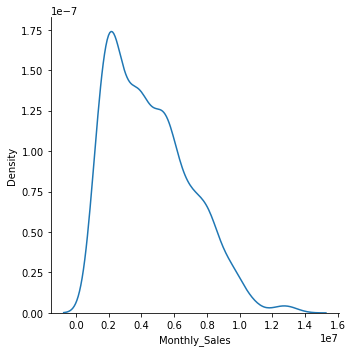

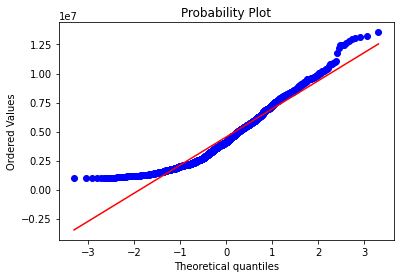

In [19]:
sns.displot(new_data['Monthly_Sales'], kind='kde');
fig = plt.figure()
res = stats.probplot(new_data['Monthly_Sales'], plot=plt)

So, certainly not normal: we have right-skewness and the data is a bit peak-y. Let's apply a log transform on the data and see what happens...

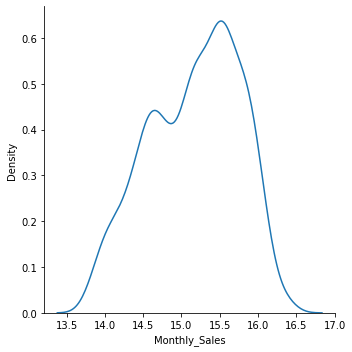

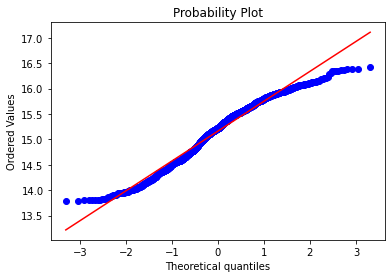

In [20]:
sns.displot(np.log(new_data['Monthly_Sales']), kind='kde');
fig = plt.figure()
res = stats.probplot(np.log(new_data['Monthly_Sales']), plot=plt)

In [21]:
new_data['Monthly_Sales']=np.log(new_data['Monthly_Sales'])

# Feature Analysis

Now we know the target is Sales. So lets consider the dependent variable is Sales (ie., monthly sales here) and independent variables are store, year, month, holiday flag, temperature, fuel_price, cpi, unemployment

In [22]:
X=new_data[['Store','Year','Month','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
Y=new_data['Monthly_Sales']

In [23]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [24]:
reg.coef_

array([-0.01442493, -0.03682407,  0.02391506, -0.04255598, -0.00360746,
        0.09120126, -0.00181084, -0.0116266 ])

In [25]:
reg.intercept_

89.72469690286152

In [26]:
reg.score(X,Y)

0.12581560327529873


> **Formula for Adjusted R^2**

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n=number of observation
p=number of predictors

In [27]:
X.shape

(1485, 8)

In [28]:
r2=reg.score(X,Y)
n=X.shape[0]
p=X.shape[1]

adj_r2 = 1 - (1-r2) *(n-1)/(n-p-1)
adj_r2

0.12107747646378275

Adj.R^2 < R^2, therefore one or more of the predictors have little or no explanatory power.

f_regression provides two arrays being F-statistics and p-values respectively

In [29]:
f_regression(X,Y)

(array([137.6262077 ,   0.58183486,  14.30765755,   2.14241125,
          7.92815445,   0.65924667,   8.93963006,   8.598905  ]),
 array([1.86215306e-30, 4.45715322e-01, 1.61403063e-04, 1.43488457e-01,
        4.93154221e-03, 4.16956328e-01, 2.83645802e-03, 3.41525282e-03]))

We only need p-values. So we pick that

In [30]:
p_values=f_regression(X,Y)[1]
p_values

array([1.86215306e-30, 4.45715322e-01, 1.61403063e-04, 1.43488457e-01,
       4.93154221e-03, 4.16956328e-01, 2.83645802e-03, 3.41525282e-03])

So the p_values of the independent variables, 'Store','Year','Month','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment' are below.

As we know the lowest p-values has significant effect on target/dependent variable(s), we can see Fuel_Price,Year is not significant in determining values for target (as they have p_value > alpha value which is 0.05)

These are univariate p-values reached from simple linear models. They do not reflect the interconnection of the features in our multi linear regression.

In [31]:
p_values.round(3)

array([0.   , 0.446, 0.   , 0.143, 0.005, 0.417, 0.003, 0.003])

Creating a Summary Table

In [32]:
reg_summary = pd.DataFrame(data=X.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,Store,-0.014425,0.000
1,Year,-0.036824,0.446
2,Month,0.023915,0.000
3,Holiday_Flag,-0.042556,0.143
4,Temperature,-0.003607,0.005
5,Fuel_Price,0.091201,0.417
6,CPI,-0.001811,0.003
7,Unemployment,-0.011627,0.003


# Feature Scaling - Standardization

In [33]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [34]:
x_scaled = scaler.transform(X)
x_scaled #this is all the standardized data

array([[-1.69397911, -1.21645747, -1.34444464, ..., -1.77098323,
         1.00775183,  0.05778407],
       [-1.69397911, -1.21645747, -1.03634274, ..., -1.47064026,
         1.00786076,  0.05778407],
       [-1.69397911, -1.21645747, -0.72824084, ..., -1.27719532,
         0.99035433, -0.10111324],
       ...,
       [ 1.69397911,  1.29248607,  0.50416674, ...,  0.91634773,
         0.50046869,  0.36598089],
       [ 1.69397911,  1.29248607,  0.81226863, ...,  1.3467846 ,
         0.51354614,  0.36598089],
       [ 1.69397911,  1.29248607,  1.12037053, ...,  1.31505438,
         0.52618494,  0.35691627]])

# Regression with Scaled Features

In [35]:
reg = LinearRegression()
reg.fit(x_scaled,Y)

LinearRegression()

In [36]:
reg.coef_

array([-0.187339  , -0.02935425,  0.07762062, -0.01955737, -0.06481706,
        0.04167693, -0.07126707, -0.02180481])

In [37]:
reg.intercept_

15.164630218144415

In [38]:
reg_summary=pd.DataFrame([['Intercept'],['Store'],['Year'],['Month'],['Holiday_Flag'],['Temperature'],['Fuel_Price'],['CPI'],['Unemployment']],columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7]
reg_summary

,Features,Weights
0,Intercept,15.164630
1,Store,-0.187339
2,Year,-0.029354
3,Month,0.077621
4,Holiday_Flag,-0.019557
5,Temperature,-0.064817
6,Fuel_Price,0.041677
7,CPI,-0.071267
8,Unemployment,-0.021805


# Lets test the model with new data

In [39]:
test_data=pd.DataFrame(data=[[5,2020,12,1,20.8450,2.54875,211.236828,12.106],[8,2021,10,1,25.8400,4.54875,220.236828,9.106]], columns=['Store','Year','Month','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'])
test_data

,Store,Year,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,5,2020,12,1,20.845,2.54875,211.236828,12.106
1,8,2021,10,1,25.840,4.54875,220.236828,9.106


Since our model is on scaled data, lets scale the data

In [40]:
test_data_scaled=scaler.transform(test_data)
test_data_scaled

array([[-1.38598291, 11.32826023,  1.73657432,  1.51657509, -2.20421044,
        -1.77098323,  1.00775181,  2.19063398],
       [-1.15498576, 12.582732  ,  1.12037053,  1.51657509, -1.92620898,
         2.60559909,  1.2364345 ,  0.59099655]])

In [41]:
reg.predict(test_data_scaled)

array([15.14635552, 15.20139207])

# Train your data

In [42]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=0)

In [43]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

# Random Forest Regressor

In [44]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
#n_estimators=20, random_state=0

In [45]:
regressor.predict(test_data_scaled)

array([14.44958425, 15.35059348])

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 score", r2_score(y_test,y_pred))

Mean Absolute Error: 0.12489233482384449
Mean Squared Error: 0.022100155968243954
Root Mean Squared Error: 0.1486612120502317
r2 score 0.9348406175482971


# XGBoost Regressor

In [47]:
xgr = xgboost.XGBRegressor()
xgr.fit(x_train, y_train)
y_pred = xgr.predict(x_test)

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 score", r2_score(y_test,y_pred))

Mean Absolute Error: 0.08687862768844946
Mean Squared Error: 0.01444361534134863
Root Mean Squared Error: 0.1201815931885937
r2 score 0.9574149133895457
